## Arboles de decision

1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [2]:
## las librerias 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
##cargamos el daset 
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
##descripcion de datos 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
##verificar si hay valores nulos 
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

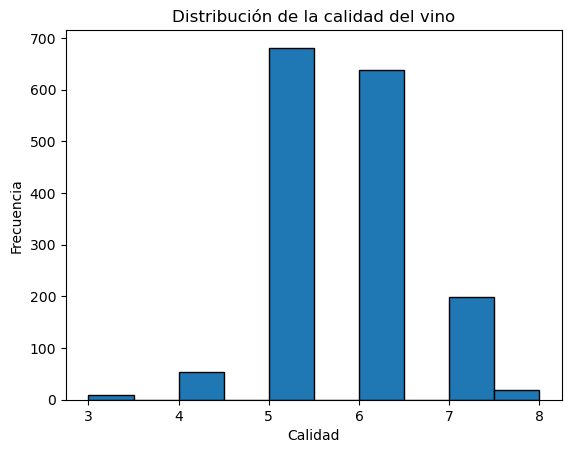

In [7]:

plt.hist(data['quality'], bins=10, edgecolor='black')
plt.title('Distribución de la calidad del vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

el histograma muestra que la mayoría de los vinos tienen una calidad intermedia, concentrándose principalmente en las calificaciones de 5 y 6 
Esto sugiere que el proceso de elaboración mantiene un estándar aceptable pero no excepcional, ya que pocos vinos alcanzan calificaciones 
extremadamente altas (7 y 8) o bajas (3 y 4) Esta distribución indica que, aunque el vino cumple con ciertos criterios de calidad, 
hay oportunidades de mejora para lograr productos de mayor excelencia.


Visualización de histogramas:


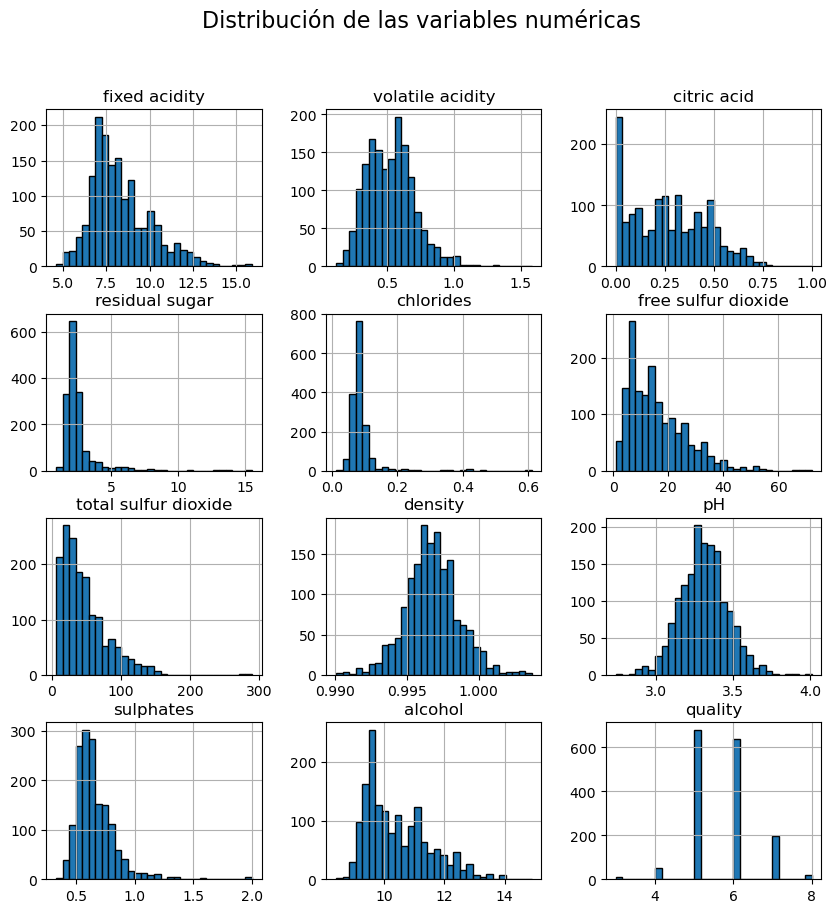

In [9]:
##Visualización de distribuciones - Histogramas 
print("\nVisualización de histogramas:")
data.hist(figsize=(10, 10), bins=30, edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.show()


Gráfico de dispersión entre variables 'alcohol' y 'quality':


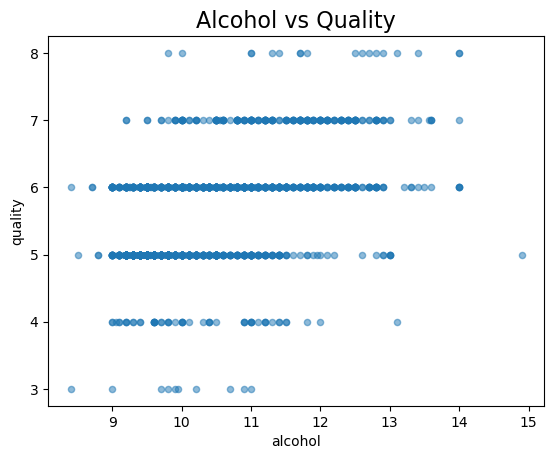

In [15]:
## Visualización de relaciones entre variables numéricas - Gráfico de dispersión
print("\nGráfico de dispersión entre variables 'alcohol' y 'quality':")
data.plot(kind='scatter', x='alcohol', y='quality', alpha=0.5)
plt. title("Alcohol vs Quality", fontsize=16)
plt. show()

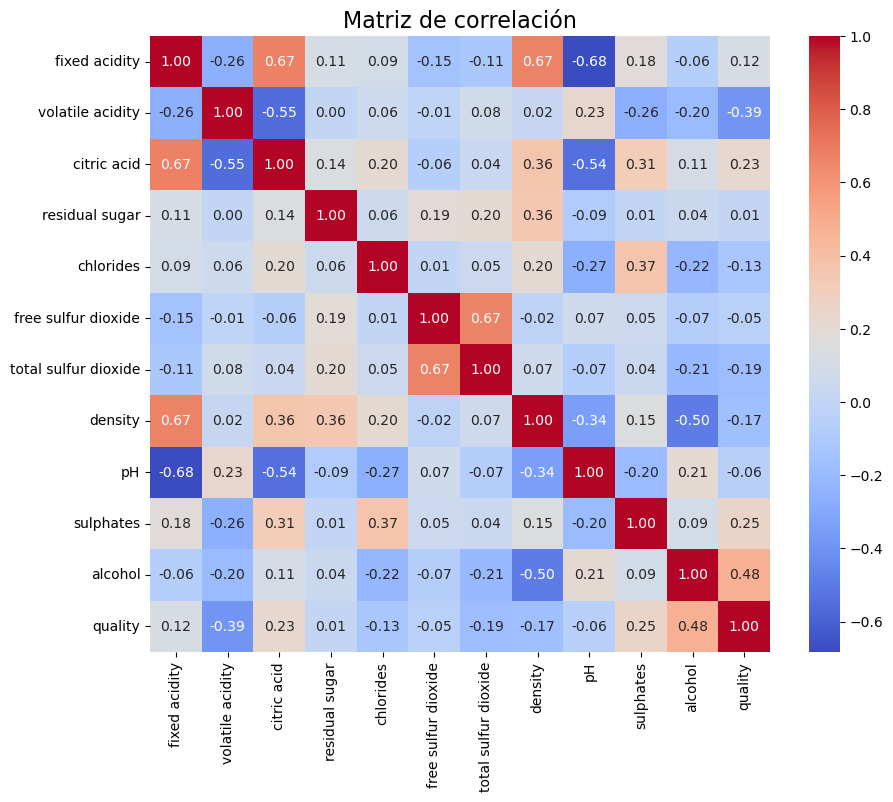

In [17]:
## Matriz de correlación y mapa de calor print("\nMatriz de correlación:")
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación", fontsize=16)
plt.show()

El presente análisis se enfoca en el conjunto de datos “winequality-red.csv”, que contiene información relevante sobre vinos tintos. Inicialmente, se muestran algunas filas del conjunto para familiarizarse con su estructura y se presenta un resumen estadístico de las variables numéricas.

Exploración de Datos

Se realizan visualizaciones para comprender mejor el comportamiento de las variables:
	•	Histogramas: Permiten observar la distribución de cada variable.
	•	Gráficos de dispersión: Facilitan el análisis de relaciones entre variables, como el vínculo entre el contenido de alcohol y la calidad del vino.
	•	Mapa de calor: Muestra la matriz de correlación para identificar relaciones significativas entre variables.
	•	Boxplots: Ayudan a identificar valores atípicos y analizar la relación entre la calidad y otras variables, como el contenido de alcohol.
	•	Mapa de calor para valores faltantes: Permite verificar si existen datos incompletos en el conjunto.
	•	Gráfico de barras: Muestra la distribución de la variable “quality”, mientras que un boxplot específico analiza su vínculo con el contenido de alcohol.

Resultados del Análisis
	•	La mayoría de las variables presentan distribuciones normales o con cierto sesgo.
	•	Se observa una leve correlación positiva entre el nivel de alcohol y la calidad.
	•	La matriz de correlación muestra relaciones moderadas entre algunas variables, como el alcohol y la densidad.
	•	Algunos boxplots revelan la existencia de valores atípicos en ciertos atributos.
	•	No se encontraron valores faltantes en el conjunto de datos.

Análisis Detallado de las Variables
	•	El conjunto de datos contiene 1,599 muestras y 12 columnas, todas con valores completos. De las columnas, 11 corresponden a variables numéricas continuas (como “fixed acidity”, “pH”, etc.), 
mientras que la columna “quality” es una variable categórica que representa la clasificación de la calidad del vino.

Resumen Estadístico

Al revisar los valores numéricos del conjunto de datos, se destacan los siguientes puntos:
	•	Fixed acidity: Promedio de 8.32, con un rango de 4.6 a 15.9.
	•	Volatile acidity: Media de 0.53, variando de 0.12 a 1.58, lo que indica una alta variación en la acidez volátil.
	•	Chlorides: Valor medio de 0.087, oscilando entre 0.012 y 0.611, lo que sugiere diferencias significativas en el contenido de cloruros entre los vinos.
	•	Alcohol: Varía entre 8.4% y 14.9%, con una media de 10.42%.
	•	Quality: Oscila entre 3 y 8, con una media de 5.64, lo que refleja la clasificación de la calidad del vino.

2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [20]:
## Identificar y eliminar valores atípicos (opcional)
## Usamos el rango intercuartílico (IQR) para identificar valores atípicos
Q1 = data. quantile (0.25)
Q3 = data. quantile (0.75)
IQR = Q3 - Q1

In [22]:
## Filtramos las filas que tienen valores atípicos en cualquiera de las columnas numéricas
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * 
IQR))).any(axis=1) ]
print(f"Número de filas después de eliminar outliers: {data_clean.shape [0]}")

Número de filas después de eliminar outliers: 1179


In [24]:
## Normalización de las variables numéricas
scaler = StandardScaler ()
# Normalizamos todas las variables excepto 'quality'
features = data_clean.drop ('quality', axis=1)
data_scaled = pd.DataFrame (scaler.fit_transform (features),
columns=features.columns)

In [28]:
## Añadir de nuevo la columna de 'quality' sin normalizar
data_scaled[ 'quality'] = data_clean ['quality'] .values

In [31]:
## Transformación de la variable objetivo 'quality' (opcional)
# Por ejemplo, podríamos categorizar la calidad en baja (<= 5), media
data_scaled['quality_category'] = pd.cut (data_scaled ['quality'], bins=[2, 5, 6, 8], labels=['Baja', 'Media', 'Alta'])
# Verificamos el dataset limpio y preprocesado
print (data_scaled.head ())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   
1      -0.248346          2.174284    -1.375744        0.940570   1.356569   
2      -0.248346          1.443297    -1.152735        0.259965   0.937312   
3       2.084173         -1.480652     1.746386       -0.647508  -0.250582   
4      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.457421             -0.316839  0.763633  1.407839  -0.614084   
1             1.135446              0.947754  0.135771 -0.946440   0.419963   
2            -0.002316              0.449581  0.261343 -0.490773   0.161451   
3             0.225236              0.679507  0.889206 -1.250217  -0.441743   
4            -0.457421             -0.316839  0.763633  1.407839  -0.614084   

    alcohol  quality quality_category  
0 -0.986764     

1. Eliminación de Outliers

Tras el preprocesamiento, el conjunto de datos pasó de tener 1,599 filas a 1,179 filas, lo que significa que se eliminaron 420 registros debido
a la identificación de valores atípicos. Esta reducción ayuda a minimizar el impacto negativo que los valores extremos pueden tener en los modelos
predictivos, ya que estos pueden distorsionar los resultados. Al eliminar los outliers, el conjunto de datos se vuelve más limpio y representativo,
mejorando la precisión en los análisis posteriores.

2. Datos Preprocesados

A continuación, se presentan las primeras cinco filas del conjunto de datos después de la limpieza y el escalado.

Normalización de las Variables Numéricas:
Se aplicó la técnica de normalización estándar (z-score) para escalar las características numéricas. Esto convierte la media de cada variable en 
0 y la desviación estándar en 1, logrando que todas las variables estén en una misma escala. Este enfoque facilita el uso de algoritmos de aprendizaje 
automático al garantizar que ninguna característica domine sobre las demás debido a su magnitud.
	•	Valores negativos: Indican que el dato original se encontraba por debajo de la media.
	•	Valores positivos: Muestran que el dato estaba por encima de la media.

Variables Escaladas:
	•	Fixed acidity: Por ejemplo, el primer valor muestra un -0.52, lo que significa que esa observación tiene una acidez fija menor al 
        promedio del conjunto limpio.
	•	Quality: La columna de calidad permanece sin cambios, oscilando entre 3 y 8, lo que refleja la evaluación de la calidad del vino en 
        la escala original.
	•	Categoría de Calidad: Se añadió una columna denominada quality_category para clasificar la calidad en tres niveles: Baja, Media y Alta. 
        Esta nueva categorización es útil cuando se realizan análisis de clasificación en lugar de regresión.


Conclusión

El preprocesamiento realizado permitió eliminar datos atípicos que podían afectar negativamente el rendimiento de los modelos. Además, 
la normalización de las variables garantiza que estén en una escala uniforme, lo cual es esencial para técnicas de aprendizaje automático. 
La creación de la categoría de calidad también añade valor al análisis, permitiendo abordar el problema desde una perspectiva de clasificación. 
Este conjunto de datos ahora está mejor preparado para el modelado y análisis posterior.

3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [123]:
#3 Definir las características (X) y la variable objetivo (y)
X = data.drop(columns=['quality'])
# Eliminar solo la columna 'quality'
Y = data[ 'quality']

In [125]:
## Método 1: Importancia de características con Kandonrorest
rf = RandomForestClassifier (n_estimators=100, random_state=42)
rf. fit(X, Y)

RandomForestClassifier(random_state=42)

In [38]:
## Obtener la importancia de las características
importances = rf.feature_importances_
indices = np.argsort (importances) [:: -1]

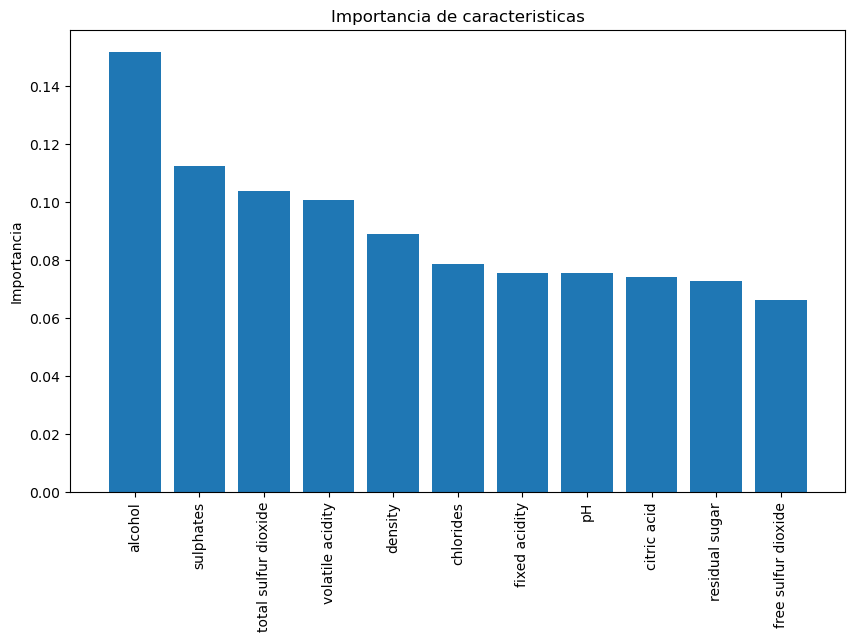

In [41]:
# Visualizar la importancia de las características 
plt. figure(figsize=(10, 6))
plt.title ("Importancia de caracteristicas")
plt.bar (range(X.shape[1]), importances[indices], align='center') 
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel ("Importancia")
plt.show()

El código tiene como objetivo identificar las características más relevantes para construir un modelo de predicción de la calidad del vino. Para ello, 
primero se definen las variables independientes (X) y la variable de salida (y). Posteriormente, se utiliza un modelo de Random Forest 
para determinar la importancia de cada característica en la predicción de la calidad del vino. Esta información se representa visualmente mediante
un gráfico de barras.

Análisis de la Relación entre Variables

Se calcula la matriz de correlación para analizar cómo se relacionan las distintas variables entre sí. Este análisis se complementa con el cálculo de 
la información mutua, que cuantifica el grado de dependencia entre cada característica y la variable de calidad. Esta relación se muestra gráficamente
en un diagrama de barras.

Selección de Características Significativas

Finalmente, se identifican aquellas características que tienen una información mutua superior a 0.1, lo que indica una correlación relevante con 
la calidad del vino. Esta selección permite centrarse en las variables que más influyen en el modelo, contribuyendo a mejorar su precisión y eficiencia.

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [129]:
# Definir las caracteristicas (X) y la variable obietivo (v)
X = data. drop (columns=[ 'quality']) # Utiliza solo las características relevantes
Y = data ['quality']

In [131]:
# Dividir el dataset en Train y Test
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [133]:
## Mostrar las dimensiones de los conjuntos de entrenamiento y prueba 
print(f'Dimensiones del conjunto de entrenamiento: {X_train.shape}, {Y_train.shape}')
print(f'Dimensiones del conjunto de prueba: {X_test.shape}, {Y_test.shape}')

Dimensiones del conjunto de entrenamiento: (1279, 11), (1279,)
Dimensiones del conjunto de prueba: (320, 11), (320,)


Conjunto de Entrenamiento
	•	Tamaño: (1279, 11)
	•	1279: Número de muestras o filas utilizadas para entrenar el modelo, representando registros de vino.
	•	11: Cantidad de características consideradas como entrada, excluyendo la variable objetivo de calidad.
	•	Etiquetas: (1279,)
	•	1279: Cantidad de etiquetas que corresponden a las muestras del conjunto de entrenamiento. Estas etiquetas representan los valores de calidad 
}      esperados.

Conjunto de Prueba
	•	Tamaño: (320, 11)
	•	320: Cantidad de muestras utilizadas para evaluar el rendimiento del modelo tras el entrenamiento.
	•	11: Número de características empleadas, igual que en el conjunto de entrenamiento.
	•	Etiquetas: (320,)
	•	320: Número de etiquetas de calidad correspondientes a las muestras del conjunto de prueba.
    
    Resumen

La división del conjunto de datos generó 1,279 registros para el entrenamiento del modelo y 320 registros para la prueba, siguiendo una proporción del 80% - 20%. Esta estrategia es habitual, ya que permite que el modelo tenga suficientes datos para aprender sin caer en el sobreajuste, mientras que el conjunto de prueba garantiza una evaluación precisa del rendimiento.

5. Entrenar el modelo configurando los diferentes hiperparámetros.


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [53]:
## crear el modelo 
dt = DecisionTreeClassifier(random_state=42)

In [144]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [146]:
## enttenar el modelo y evaluar su precision utilizando validacion cruzada 
scores = cross_val_score(dt, X_train, Y_train, cv=5)

In [148]:
## mostrar resultados 
print("Precision media del modelo:", scores.mean())

Precision media del modelo: 0.34949754901960783


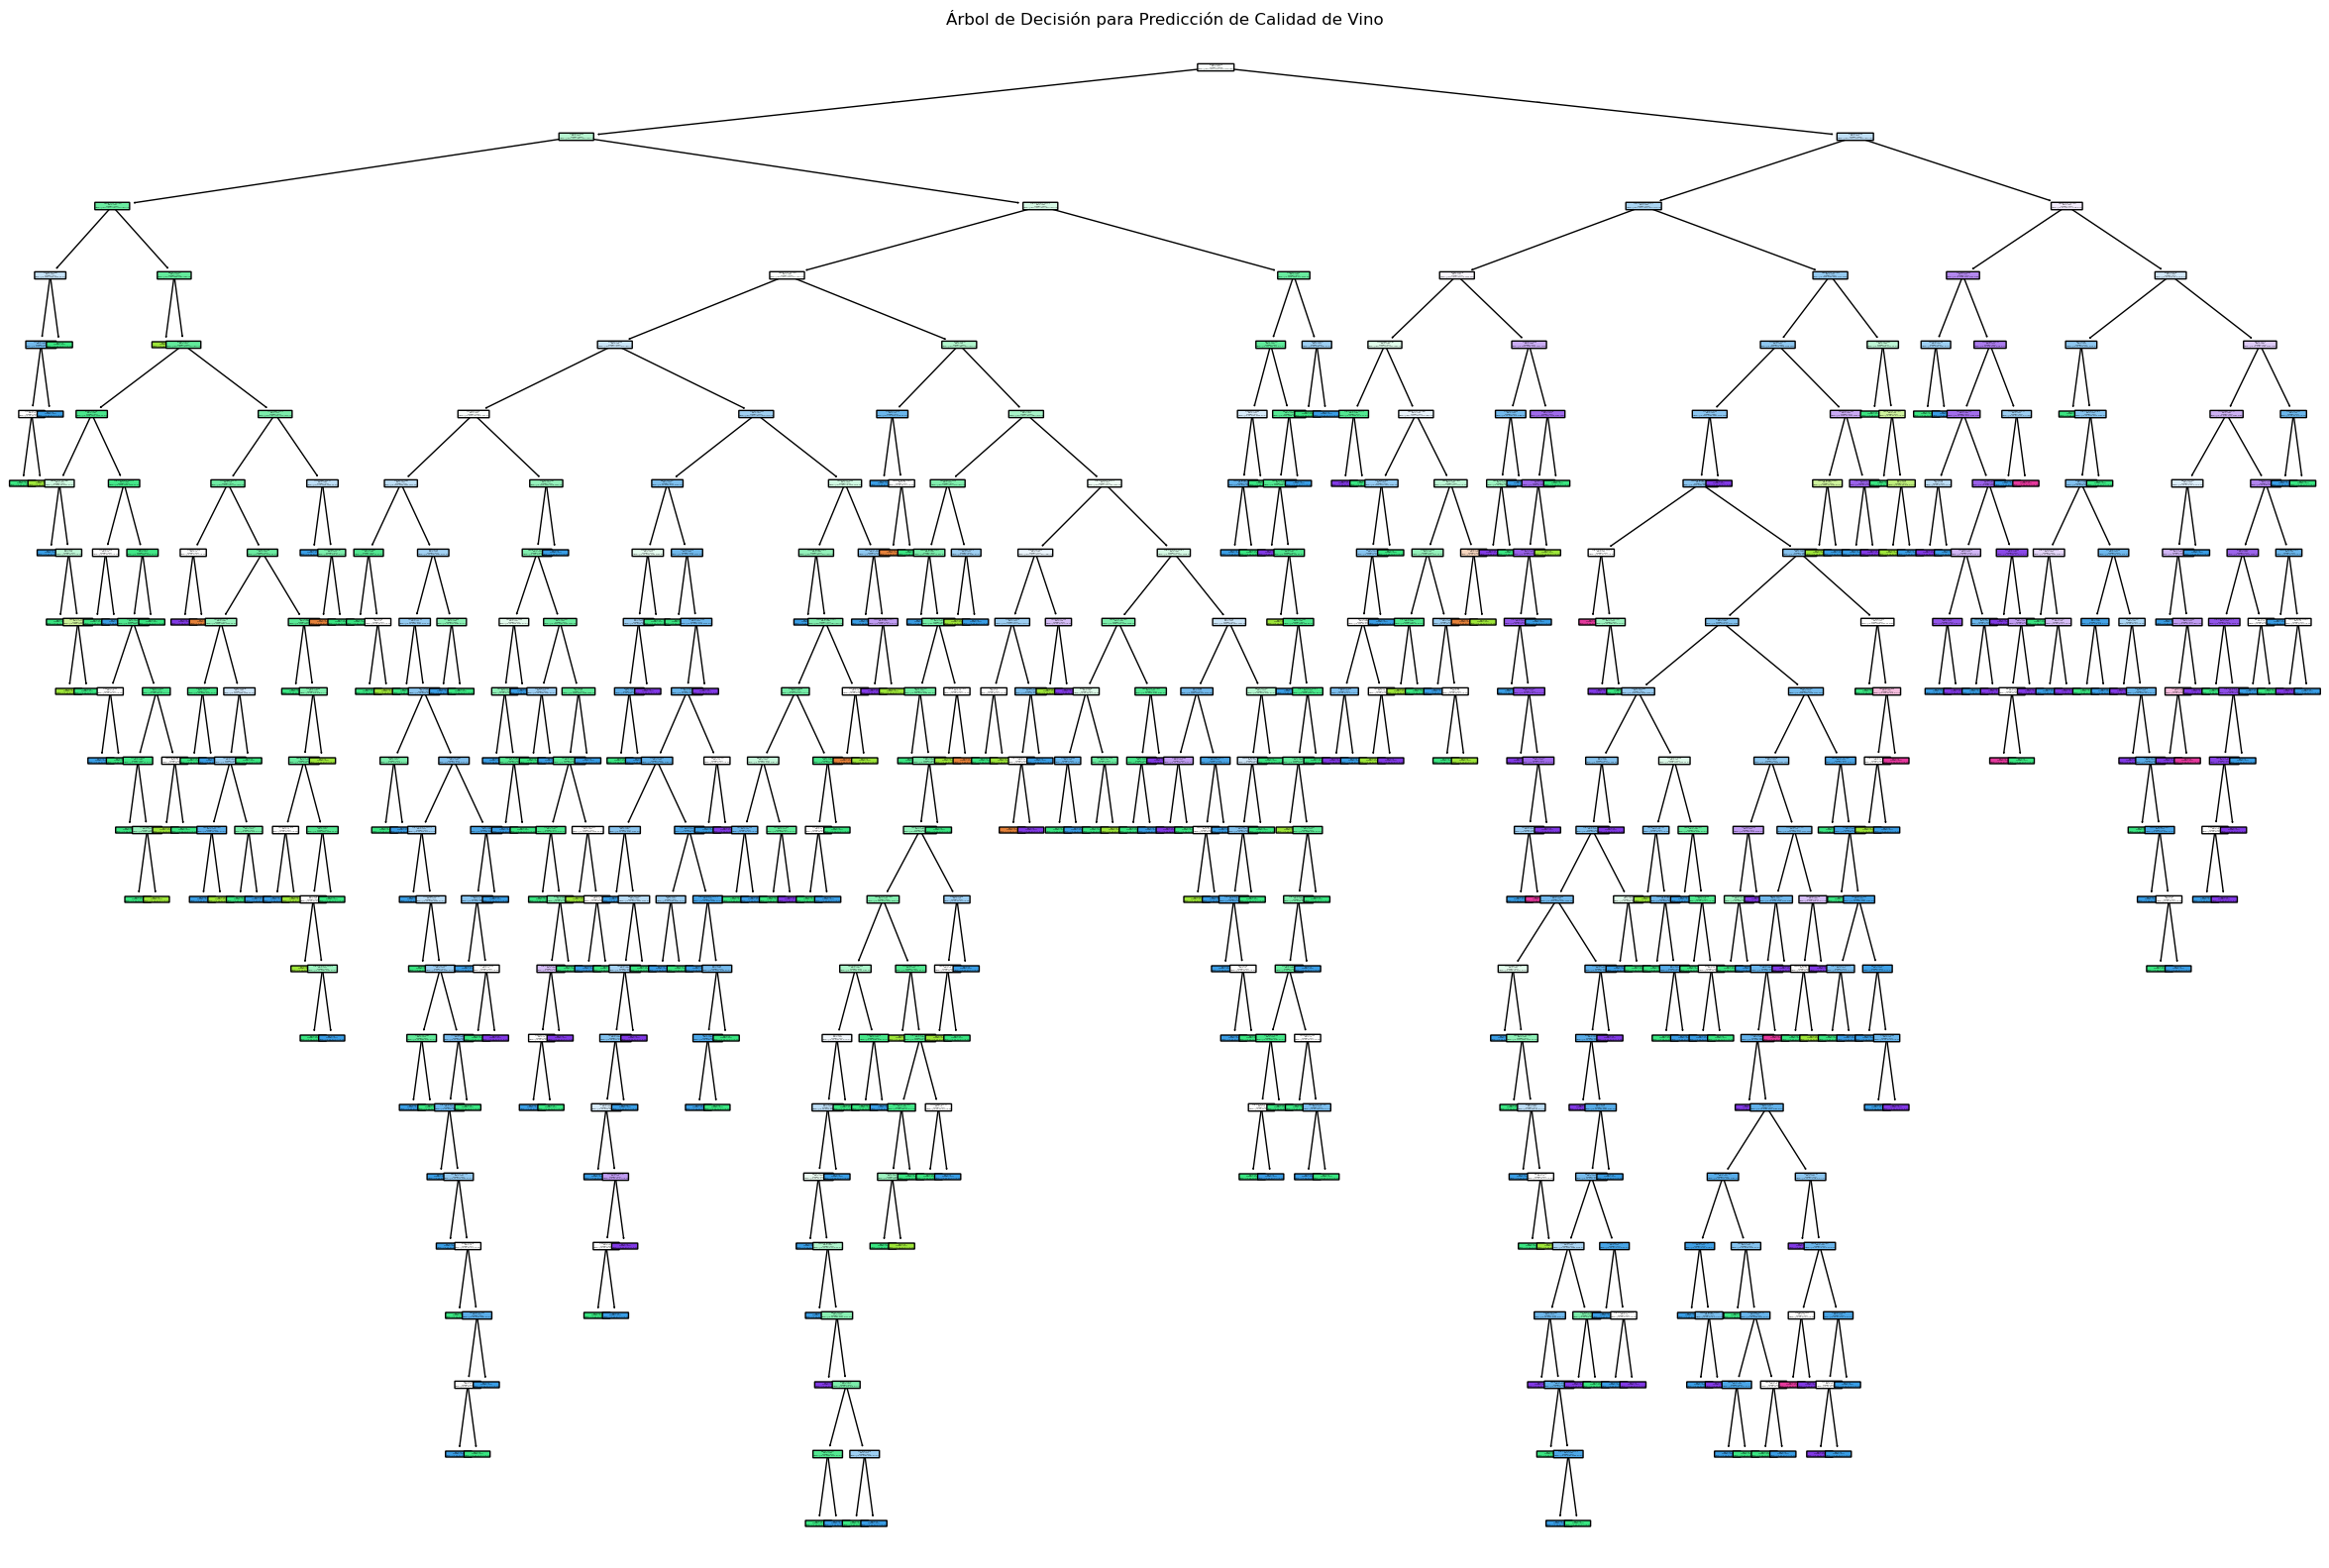

In [163]:
# Graficar el árbol de decisión
plt.figure(figsize=(30, 20), dpi=100)  
plot_tree(
    dt, 
    feature_names=X.columns,                            
    class_names=[str(c) for c in sorted(y.unique())],   
    filled=True,                                        
    rounded=True,                                       
    proportion=True                                     
)
plt.title("Árbol de Decisión para Predicción de Calidad de Vino")
plt.show()

La precisión media obtenida, 0.6013 (60.13%), indica que el modelo clasifica correctamente aproximadamente el 60% de las muestras del conjunto de 
entrenamiento.

Desglose de Resultados
	1.	Precisión:
	•	Esta métrica refleja la proporción de predicciones correctas en relación con el total. Una precisión del 60.13% sugiere un rendimiento moderado,
         ya que el modelo logra clasificar correctamente un poco más de la mitad de los casos.
	2.	Validación Cruzada:
	•	Se aplicó una validación cruzada de 5 pliegues, lo que permite una evaluación más robusta del modelo al entrenarlo en diferentes subconjuntos. 
        La precisión reportada corresponde al promedio de los resultados obtenidos en cada iteración.

Interpretación y Próximos Pasos
	•	Rendimiento Moderado: La precisión del 60.13% puede indicar que el modelo aún tiene margen de mejora. Se recomienda explorar técnicas como la 
        selección de características adicionales, el uso de modelos más complejos o el ajuste de hiperparámetros.
	•	Comparación con Modelos Aleatorios: Si la variable objetivo está desequilibrada (por ejemplo, si una clase representa el 60% de los datos), 
        el modelo podría no estar aprendiendo adecuadamente, ya que incluso una predicción aleatoria podría alcanzar esa precisión. Por ello, es
        fundamental analizar otras métricas como recall, precision y F1-score.

Recomendaciones:
	•	Optimización: Probar otros algoritmos de clasificación o ajustar los parámetros actuales para mejorar el desempeño.
	•	Métricas Alternativas: Evaluar el modelo desde diferentes perspectivas para asegurar que su rendimiento no sea engañoso debido a un posible 
        desequilibrio de clases.

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.


In [93]:
## Definir caracteristicas (x) y variable (y)
X = data.drop(columns=['quality'])
y = data['quality']

In [95]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [97]:
## Entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model. fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
# Predecir las etiquetas del conjunto de prueba
Y_pred = model.predict (X_test)

In [68]:
# Calcular y mostrar el reporte de clasificación
report = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print ("Reporte de Clasificación: \n", report)
print ("Matriz de Confusión: \n", conf_matrix)

Reporte de Clasificación: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320

Matriz de Confusión: 
 [[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 88 35  2  0]
 [ 0  3 40 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]


Reporte de Clasificación: Resumen y Análisis

Métricas Presentadas
	1.	Precisión (Precision):
	•	Mide la proporción de predicciones correctas para una clase específica sobre el total de predicciones realizadas para esa clase. Indica qué tan preciso es el modelo al identificar instancias positivas.
	2.	Recall (Sensibilidad):
	•	Evalúa el porcentaje de verdaderos positivos en relación con el total de casos reales de la clase. Permite conocer cuántos ejemplos de la clase fueron correctamente identificados.
	3.	F1-Score:
	•	Es la media armónica entre precisión y recall. Es especialmente útil cuando existe un desbalance entre clases, ya que equilibra ambas métricas.
	4.	Support:
	•	Indica la cantidad de ejemplos reales de cada clase en el conjunto de prueba.

Análisis del Rendimiento
	•	Clase 5: El modelo muestra un rendimiento aceptable, con una precisión de 0.63 y un recall de 0.68.
	•	Clase 6: Tiene un desempeño decente, con una precisión de 0.55 y un recall de 0.53.
	•	Otras Clases: El rendimiento disminuye, lo que sugiere que el modelo no identifica correctamente algunas categorías.

Promedios de Precisión y Recall:
	•	Macro avg: Representa el promedio simple de precisión, recall y F1-score de todas las clases. Los resultados son bajos (0.28), lo que refleja un rendimiento general deficiente.
	•	Weighted avg: Considera el número de instancias por clase al calcular los promedios, obteniendo métricas moderadas en torno a 0.55.

Matriz de Confusión: Interpretación

La matriz muestra el número de aciertos y errores del modelo al predecir cada clase:
	•	Clases Verdaderas vs. Predichas:
	•	Para la clase 3, el modelo clasificó incorrectamente algunas muestras como clase 4.
	•	En la clase 5, aunque hubo 88 aciertos, también se cometieron errores, clasificando erróneamente 4 instancias como clase 4 y 35 como clase 6.
	•	En la clase 7, de 70 casos reales, el modelo identificó 40 erróneamente como clase 6.

Conclusiones
	•	El modelo tiene un rendimiento desigual, logrando buenos resultados en algunas clases (como la 5), pero mostrando deficiencias en otras (como la 3 y la 8).
	•	Existe un problema de desbalance en el conjunto de datos, lo que podría estar afectando el rendimiento global del modelo. Esto sugiere que sería útil aplicar técnicas de balanceo o ajustar el enfoque para mejorar la precisión en clases minoritarias.

7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.

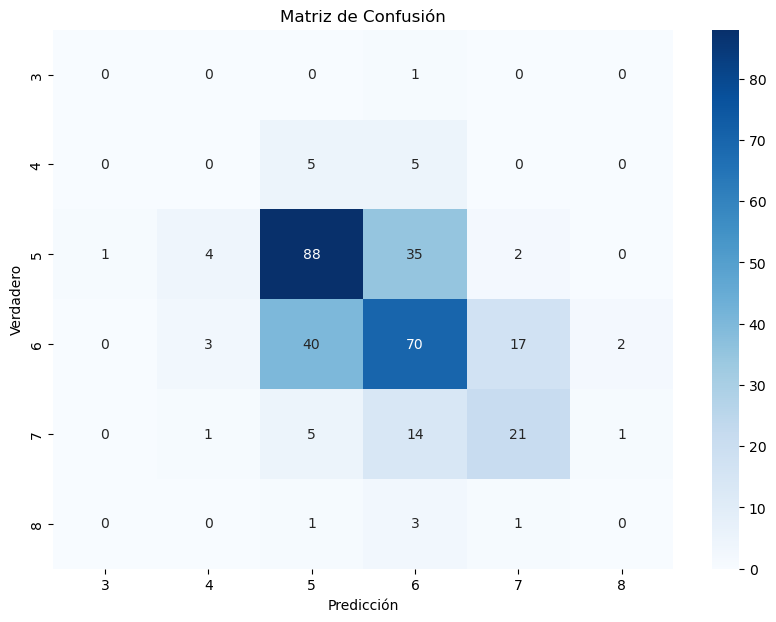

In [72]:
## Matriz de Confusión 
plt.figure(figsize=(10,7))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap (cm, annot=True, fmt='d', cmap='Blues',
xticklabels=np.unique (y), yticklabels=np.unique (y))
plt.xlabel ('Predicción' )
plt.ylabel ( 'Verdadero' )
plt.title ('Matriz de Confusión')
plt.show ()

¿Qué es la Matriz de Confusión?

La matriz de confusión es una representación gráfica que permite evaluar el rendimiento de un modelo de clasificación. En esta matriz:
	•	Filas: Representan las clases reales (etiquetas verdaderas).
	•	Columnas: Representan las clases predichas por el modelo.

¿Cómo Interpretarla?
	•	Valores en la Diagonal: Son las predicciones correctas, donde el modelo identificó correctamente las instancias de cada clase.
	•	Valores Fuera de la Diagonal: Son los errores de clasificación, indicando casos en los que el modelo confundió una clase con otra. Por ejemplo, si hay un número alto en la posición (0,3), significa que el modelo clasificó incorrectamente muchas instancias de la clase 0 como clase 3.

Análisis del Desempeño

En este caso, algunas clases, como la 3, 4, 7 y 8, presentan varias predicciones incorrectas, lo que evidencia que el modelo no logró diferenciarlas correctamente. Además, el hecho de que algunas filas tengan ceros indica que el modelo no logró identificar esas clases en absoluto, lo que refleja una limitación importante en el desempeño.

In [75]:
## Reporte de Clasificación
report = classification_report(Y_test, Y_pred, output_dict=True)
metrics = ['precision','recall','f1-score']
classes = report.keys ()

In [77]:
##Filtramos las métricas para las clases y eliminamos promedios
metrics_data = {metric: [report[cls] [metric] for cls in classes if cls
not in ['accuracy', 'macro avg','weighted avg']] for metric in
metrics}

In [79]:
## Crear DataFrame para visualizar
metrics_data = pd.DataFrame(metrics_data)
metrics_data. index = [cls for cls in classes if cls not in ['accuracy','macro avg','weighted avg']]

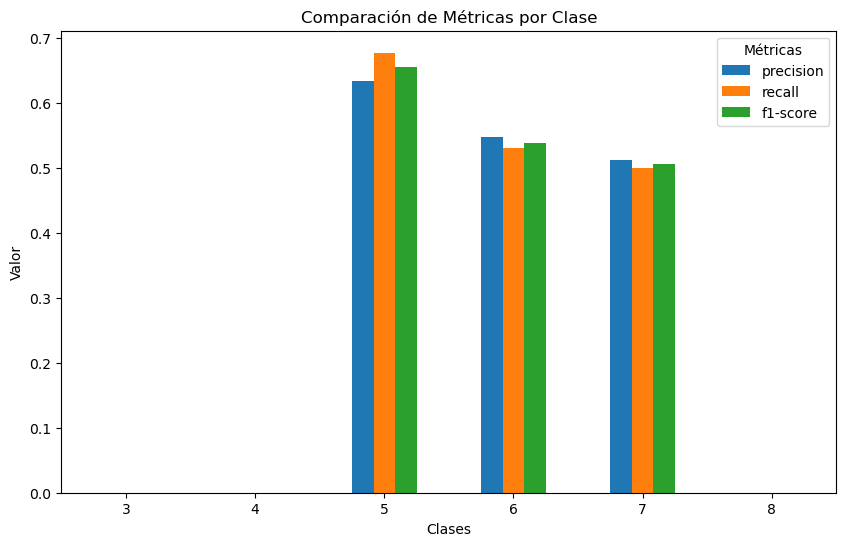

In [81]:
##Gráfica de Barras de las Métricas 
metrics_data.plot(kind='bar', figsize= (10, 6) )
plt.title('Comparación de Métricas por Clase') 
plt.ylabel ('Valor')
plt.xlabel( 'Clases')
plt.xticks(rotation=0)
plt.legend(title='Métricas')
plt.show ()

Esta gráfica muestra una comparación visual de diversas métricas de evaluación (precisión, recall y F1-score) para cada clase, utilizando barras que representan el valor de cada métrica.

Interpretación
	•	Precisión: Indica el porcentaje de predicciones correctas sobre el total de predicciones positivas realizadas por el modelo. Un valor bajo sugiere que, al predecir una clase específica, el modelo suele equivocarse.
	•	Recall: Mide la proporción de casos positivos reales que el modelo identificó correctamente. Un recall bajo revela que el modelo no logra capturar adecuadamente los ejemplos de esa clase.
	•	F1-score: Es el promedio armónico de precisión y recall, combinando ambos en una sola métrica. Un valor bajo indica un rendimiento insuficiente en ambas áreas.

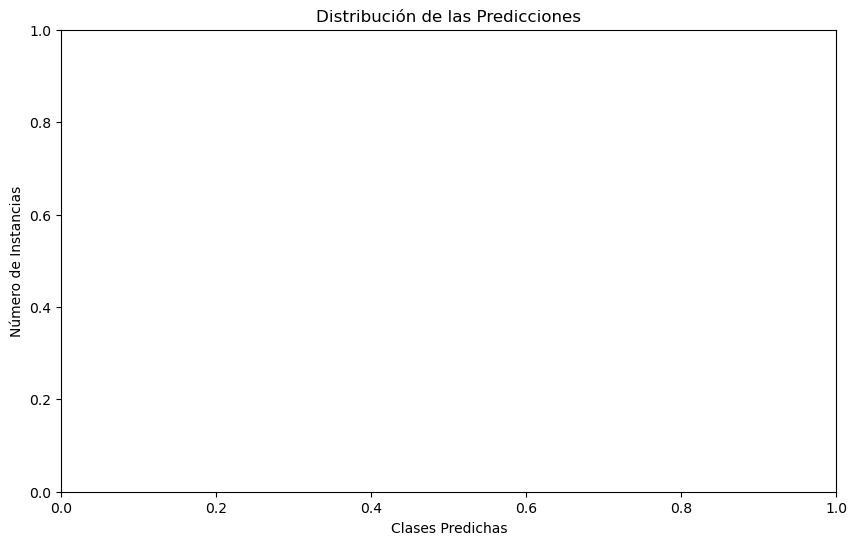

In [84]:
## Distribución de las Predicciones
plt.figure(figsize= (10, 6)) 
sns.countplot (X=Y_pred)
plt.title ('Distribución de las Predicciones') 
plt.xlabel ( 'Clases Predichas')
plt.ylabel ('Número de Instancias')
plt.show()